Problem Statement:
🚢 Titanic Dataset — Problem Statement
Objective:
To build a predictive model that can determine whether a passenger survived the Titanic shipwreck based on features such as age, gender, passenger class, fare paid, family relationships on board, and other relevant attributes.

Background:
On April 15, 1912, the RMS Titanic sank after colliding with an iceberg. Of the ~2,200 passengers and crew on board, more than 1,500 lost their lives. This tragic event led to one of the most well-known machine learning benchmark datasets — the Titanic passenger list.

Key Problem:
Given the characteristics of each passenger, can you accurately predict whether they survived or not?

Inputs (features):

PassengerId

Name

Sex

Age

Pclass (Passenger class)

SibSp (Number of siblings/spouses aboard)

Parch (Number of parents/children aboard)

Fare

Embarked (Port of Embarkation)

Cabin (optional, sometimes missing)

Target variable:

Survived (0 = Did not survive, 1 = Survived)

Business Goal:
To demonstrate how historical passenger data can be used to build a classification model that predicts survival outcomes. This exercise illustrates core concepts in data preprocessing, feature engineering, model building, and evaluation — and is widely used as an introductory problem for learning supervised machine learning.

Evaluation Metric:
Common metrics for this binary classification problem include accuracy, confusion matrix, precision, recall, and ROC-AUC.

<h2>STEP #01 Libraries Import</h2>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>STEP #02 Import Dataset</h2>

In [5]:
training_set=pd.read_csv("/content/train.csv")

In [6]:
training_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
training_set.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<h2>STEP #03 Explore/Visualise Dataset</h2>

In [13]:
survived=training_set[training_set["Survived"]==1]
not_survived=training_set[training_set["Survived"]==0]

In [15]:
print("Total =",len(training_set))
print("No of passengers survived",len(survived))
print("No of passengers not survived",len(not_survived))

Total = 891
No of passengers survived 342
No of passengers not survived 549


In [19]:
print("% Survived=",len(survived)/len(training_set)*100)
print("% Not Survived=",len(not_survived)/len(training_set)*100)

% Survived= 38.38383838383838
% Not Survived= 61.61616161616161


<Axes: xlabel='Embarked', ylabel='count'>

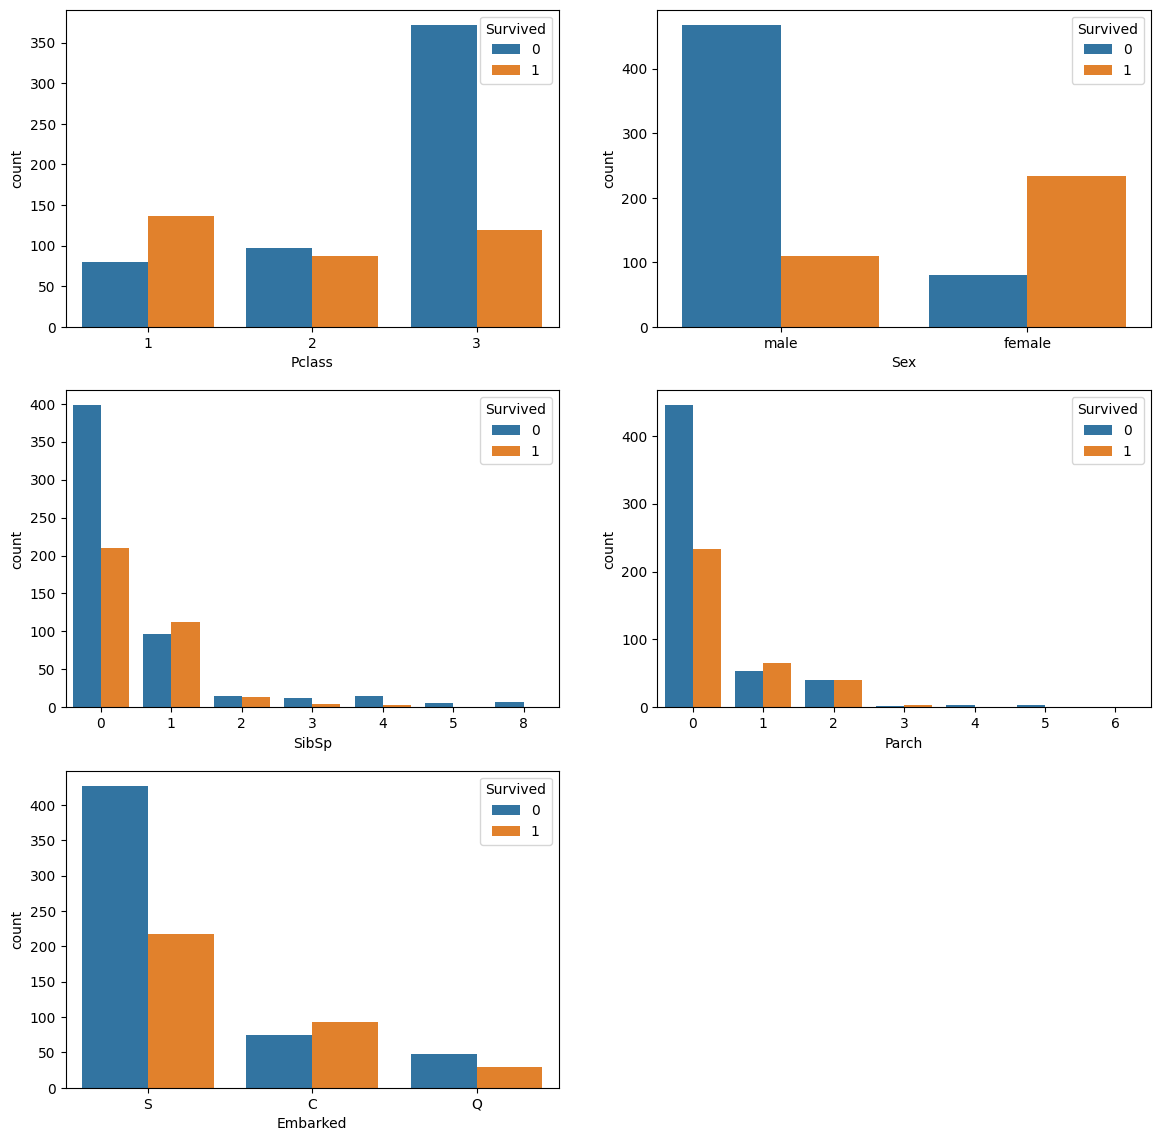

In [30]:
plt.figure(figsize=[14,14])
plt.subplot(321)
sns.countplot(x="Pclass",data=training_set,hue="Survived")
plt.subplot(322)
sns.countplot(x="Sex",data=training_set,hue="Survived")
plt.subplot(323)
sns.countplot(x="SibSp",data=training_set,hue="Survived")
plt.subplot(324)
sns.countplot(x="Parch",data=training_set,hue="Survived")
plt.subplot(325)
sns.countplot(x="Embarked",data=training_set,hue="Survived")

In [31]:
Min_age=training_set["Age"].min()
Max_age=training_set["Age"].max()
print("Minimum Age=",Min_age)
print("Maximum Age=",Max_age)

Minimum Age= 0.42
Maximum Age= 80.0


In [36]:
# Use pd.cut to create age groups
bins = [0, 10, 30, 50, 100]  # define edges
labels = ["0 to 10", "10 to 30", "30 to 50", "50+"]

training_set["Age_Group"] = pd.cut(training_set["Age"], bins=bins, labels=labels, right=True)
